## Loading Data

In [175]:
df = read.csv('./data/skincancer.csv')
head(df)
# head(df[order(df$Lat),])

State,Lat,Mort,Ocean,Long
Alabama,33.0,219,1,87.0
Arizona,34.5,160,0,112.0
Arkansas,35.0,170,0,92.5
California,37.5,182,1,119.5
Colorado,39.0,149,0,105.5
Connecticut,41.8,159,1,72.8


## Fitting Model

In [176]:
model = lm(Mort~Lat, data=df)
model.summ = summary(model)
model.summ


Call:
lm(formula = Mort ~ Lat, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.972 -13.185   0.972  12.006  43.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1894    23.8123   16.34  < 2e-16 ***
Lat          -5.9776     0.5984   -9.99 3.31e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.12 on 47 degrees of freedom
Multiple R-squared:  0.6798,	Adjusted R-squared:  0.673 
F-statistic:  99.8 on 1 and 47 DF,  p-value: 3.309e-13


In [177]:
a = model.summ$coefficients[1]
b = model.summ$coefficients[2]
cat(a, ',', b)

389.1894 , -5.977636

## Plot of Regressor vs. Response

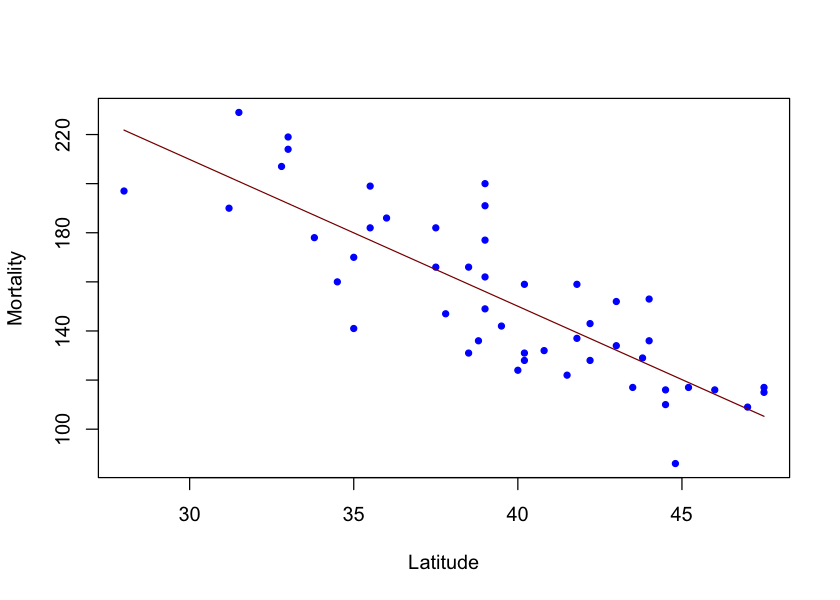

In [178]:
options(repr.plot.height=5)
plot(df$Lat, df$Mort, col='blue', pch=20, xlab='Latitude', ylab='Mortality')
points(df$Lat, y_hat, pch=20, col='darkred', type='l')

## Recalculating the Statistics

In [179]:
n = length(df[,1])
cat('n:', n, '\n')
y_hat = a + b*df$Lat
res = df$Mort - y_hat
cat('min(res):', round(min(res), digits=2), '\n')
cat('max(res):', round(max(res), digits=2), '\n')
sse = sum((df$Mort - y_hat)^2)
cat('sse:', round(sse, digits=2), '\n')
mse = sse/(n - 2)
cat('mse:', round(mse, digits=2), '\n')
cat('sqrt(mse):', round(sqrt(mse), digits=2), '\n')

y_bar = mean(df$Mort)
ssto = sum((df$Mort - y_bar)^2)
r_sqr = 1 - sse/ssto
cat('r_sqr:', round(r_sqr, digits=4))

n: 49 
min(res): -38.97 
max(res): 43.94 
sse: 17173.07 
mse: 365.38 
sqrt(mse): 19.12 
r_sqr: 0.6798

## Calculating Confidence Interval

In [180]:
ci_interval <- function (x_h, t_star, mse, n, x, print_se=F) {
    y_h = a + b*x_h
    se = sqrt(mse * (1/n + ( x_h - mean(x) )^2 / sum( (x - mean(x))^2 )))
    if (print_se) {
        cat('SE Fit:', round(se, digits=5), '\n')
    }
    margin = t_star * se

    return(c(y_h - margin, y_h + margin))
}

# test
x_h =40
cat('y_h:', round(a + b*x_h, digits=3), '\n')
round(ci_interval(x_h, t_star, mse, n, df$Lat, T), digits=3)

y_h: 150.084 
SE Fit: 2.745 


[1] 144.562 155.606

## Calculating Prediction Interval

In [181]:
pi_interval <- function (x_h, t_star, mse, n, x, print_se=F) {
    y_h = a + b*x_h
    se = sqrt(mse * (1 + 1/n + ( x_h - mean(x) )^2 / sum( (x - mean(x))^2 )))
    if (print_se) {
        cat('SE Pred:', round(se, digits=5), '\n')
    }
    margin = t_star * se

    return(c(y_h - margin, y_h + margin))
}

# test
x_h =40
cat('y_h:', round(a + b*x_h, digits=3), '\n')
round(ci_interval(x_h, t_star, mse, n, df$Lat, T), digits=3)

y_h: 150.084 
SE Fit: 2.745 


[1] 144.562 155.606

## Plots of CI & PI

In [182]:
t_star = qt(.05/2, n-2, lower.tail=F)
x_h = round(seq(min(df$Lat), max(df$Lat), length=50), digits=2)
cis = ci_interval(x_h, t_star, mse, n, df$Lat)
pis = pi_interval(x_h, t_star, mse, n, df$Lat)

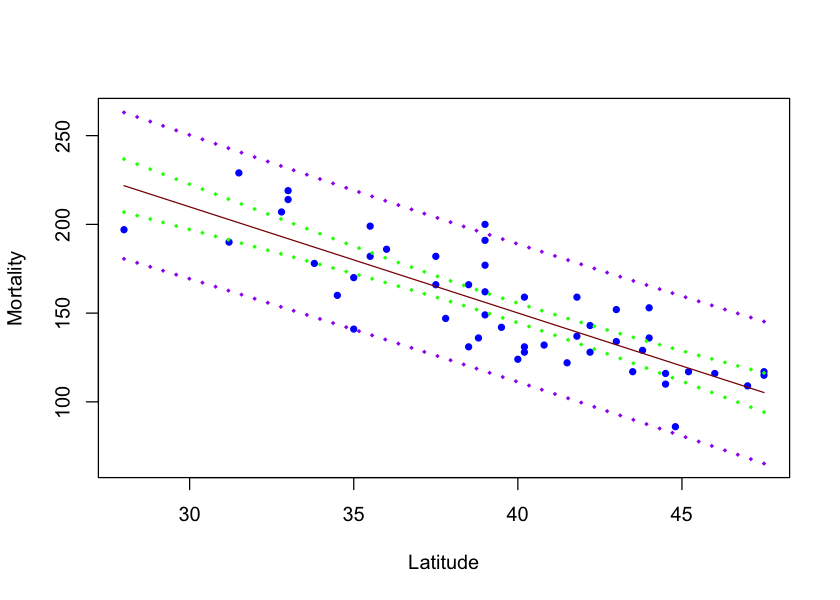

In [183]:
options(repr.plot.height=5)

ylim_l = min(c(cis, pis, df$Mort))
ylim_u = max(c(cis, pis, df$Mort))

plot(df$Lat, df$Mort, col='blue', pch=20, xlab='Latitude', ylab='Mortality', ylim=c(ylim_l, ylim_u))
points(df$Lat, y_hat, pch=20, col='darkred', type='l')
points(rep(x_h, 2), cis, col='green', pch=18, cex=.5)
points(rep(x_h, 2), pis, col='purple', pch=18, cex=.5)